In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Load the dataset
df = pd.read_csv('Sales Data.csv')

In [ ]:
# Drop thecolumn
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.shape

(185950, 10)

In [ ]:
# 1. Get the size of the dataset (number of rows and columns)
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 2. Check for missing values and handle them if necessary
# To check for missing values in each column:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 3. Check data types and assess if they make sense for their respective variables
data_types = df.dtypes
print("\nData types for each column:")
print(data_types)



Number of rows: 185950
Number of columns: 10
Missing values in each column:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Data types for each column:
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


In [ ]:
# 1. Summary statistics for numerical columns
numerical_columns = ["Quantity Ordered", "Price Each", "Sales"]
summary_statistics = df[numerical_columns].describe()
print("Summary statistics for numerical columns:")
print(summary_statistics)

# 2. Identify outliers using IQR (Interquartile Range)
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for column in numerical_columns:
    outliers = identify_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)

# 3. Unique values and their counts for categorical columns
categorical_columns = ["Product", "City", "Month"]
unique_values_counts = {col: df[col].value_counts() for col in categorical_columns}

print("\nUnique values and their counts for categorical columns:")
for col, counts in unique_values_counts.items():
    print(f"{col}:")
    print(counts)


Summary statistics for numerical columns:
       Quantity Ordered     Price Each          Sales
count     185950.000000  185950.000000  185950.000000
mean           1.124383     184.399735     185.490917
std            0.442793     332.731330     332.919771
min            1.000000       2.990000       2.990000
25%            1.000000      11.950000      11.950000
50%            1.000000      14.950000      14.950000
75%            1.000000     150.000000     150.000000
max            9.000000    1700.000000    3400.000000
Outliers in 'Quantity Ordered':
        Order ID                 Product  Quantity Ordered  Price Each  \
7         295672    USB-C Charging Cable                 2       11.95   
9         295674  AAA Batteries (4-pack)                 4        2.99   
10        295675    USB-C Charging Cable                 2       11.95   
12        295677   AA Batteries (4-pack)                 2        3.84   
13        295678  AAA Batteries (4-pack)                 2        2.99

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])


# Save the cleaned dataset
#df.to_csv('cleaned_dataset.csv', index=False)


Missing Values:
 Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [ ]:
df.shape

(185686, 10)

In [ ]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [ ]:
# Calculate basic statistics for numerical columns
numerical_stats = df[['Quantity Ordered', 'Price Each']].describe()
print("Basic Statistics for Numerical Columns:\n", numerical_stats)

# Check unique values in categorical columns
unique_products = df['Product'].unique()
unique_cities = df['City'].unique()
unique_months = df['Month'].unique()

print("\nUnique Products:\n", unique_products)
print("\nUnique Cities:\n", unique_cities)
print("\nUnique Months:\n", unique_months)


Basic Statistics for Numerical Columns:
        Quantity Ordered     Price Each
count     185686.000000  185686.000000
mean           1.124544     184.519255
std            0.443069     332.843838
min            1.000000       2.990000
25%            1.000000      11.950000
50%            1.000000      14.950000
75%            1.000000     150.000000
max            9.000000    1700.000000

Unique Products:
 ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']

Unique Cities:
 [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']

Unique Months:
 [12  1  4  5  2  3  8  9  6 11 10  7]


In [ ]:
def separate_columns_by_type(data_frame):
    numerical_columns = data_frame.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = data_frame.select_dtypes(include=['object']).columns.tolist()

    return numerical_columns, categorical_columns


# Separate columns by type
numerical_cols, categorical_cols = separate_columns_by_type(df)

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
['Order ID', 'Quantity Ordered', 'Price Each', 'Month', 'Sales', 'Hour']

Categorical Columns:
['Product', 'Purchase Address', 'City']


In [ ]:
# Calculate basic statistics for numerical columns
numerical_stats = df[numerical_cols].agg(['mean', 'median', 'std'])
print("Basic Statistics for Numerical Columns:")
print(numerical_stats)

# Check unique values in categorical columns
unique_values = {}
for column in categorical_cols:
    unique_values[column] = df[column].unique()

print("\nUnique Values in Categorical Columns:")
for column, values in unique_values.items():
    print(f"{column}: {values}")


Basic Statistics for Numerical Columns:
             Order ID  Quantity Ordered  Price Each     Month       Sales  \
mean    230411.376227          1.124544  184.519255  7.058653  185.611936   
median  230354.500000          1.000000   14.950000  7.000000   14.950000   
std      51511.717183          0.443069  332.843838  3.502932  333.032118   

             Hour  
mean    14.412934  
median  15.000000  
std      5.423329  

Unique Values in Categorical Columns:
Product: ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer']
Purchase Address: ['136 Church St, New York City, NY 10001'
 '562 2nd St, New York City, NY 10001'
 '277 Main St, New York City, 

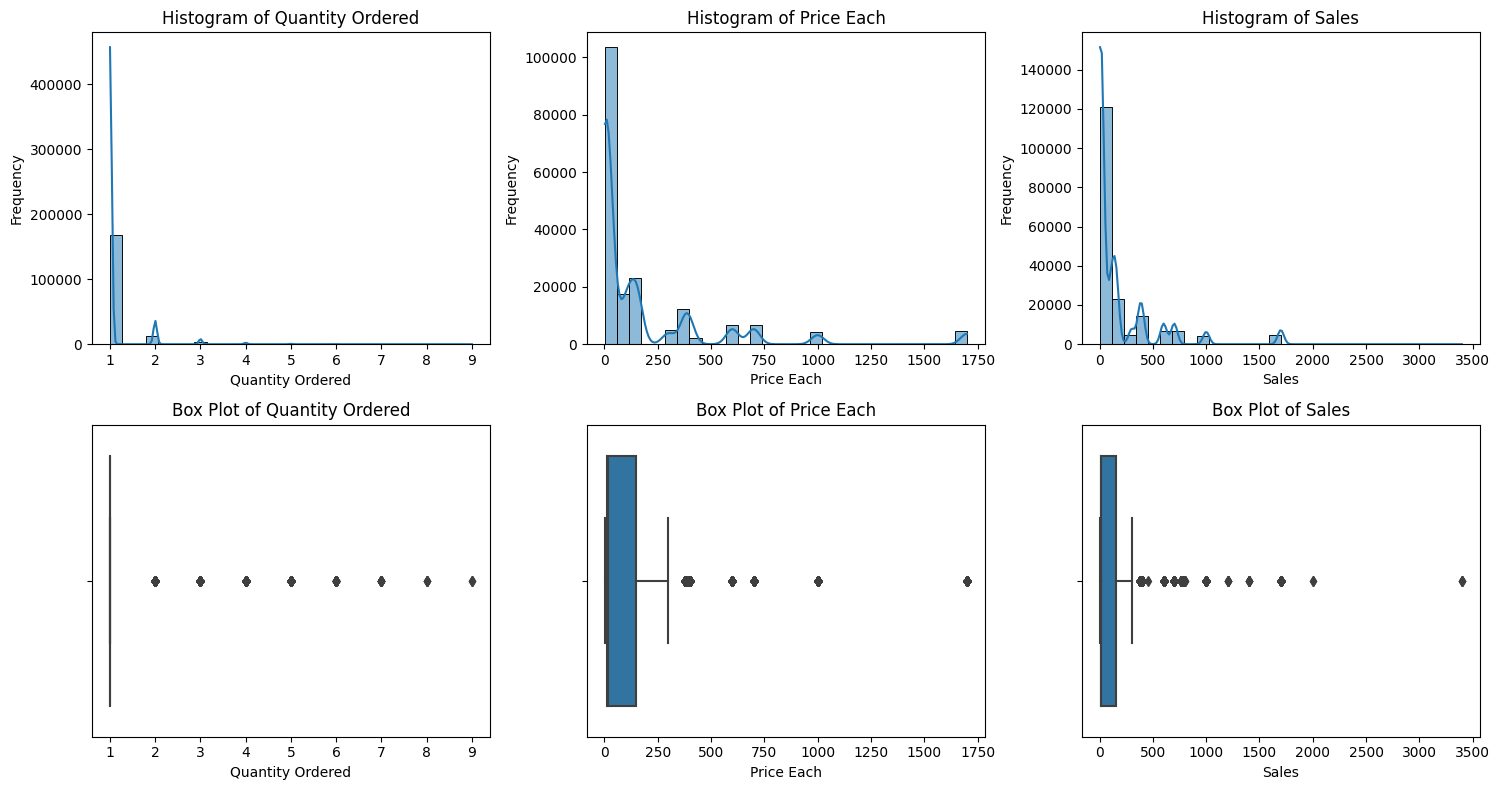

In [ ]:
# Define the numerical columns you want to visualize
numerical_columns = ["Quantity Ordered", "Price Each", "Sales"]

# Set up subplots for histograms and box plots
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns), figsize=(15, 8))
plt.subplots_adjust(wspace=0.4)

# Create histograms and box plots for each numerical column
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], ax=axes[0, i], kde=True, bins=30)
    axes[0, i].set_title(f'Histogram of {column}')
    axes[0, i].set_xlabel(column)
    axes[0, i].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(data=df, x=column, ax=axes[1, i])
    axes[1, i].set_title(f'Box Plot of {column}')
    axes[1, i].set_xlabel(column)

plt.tight_layout()
plt.show()


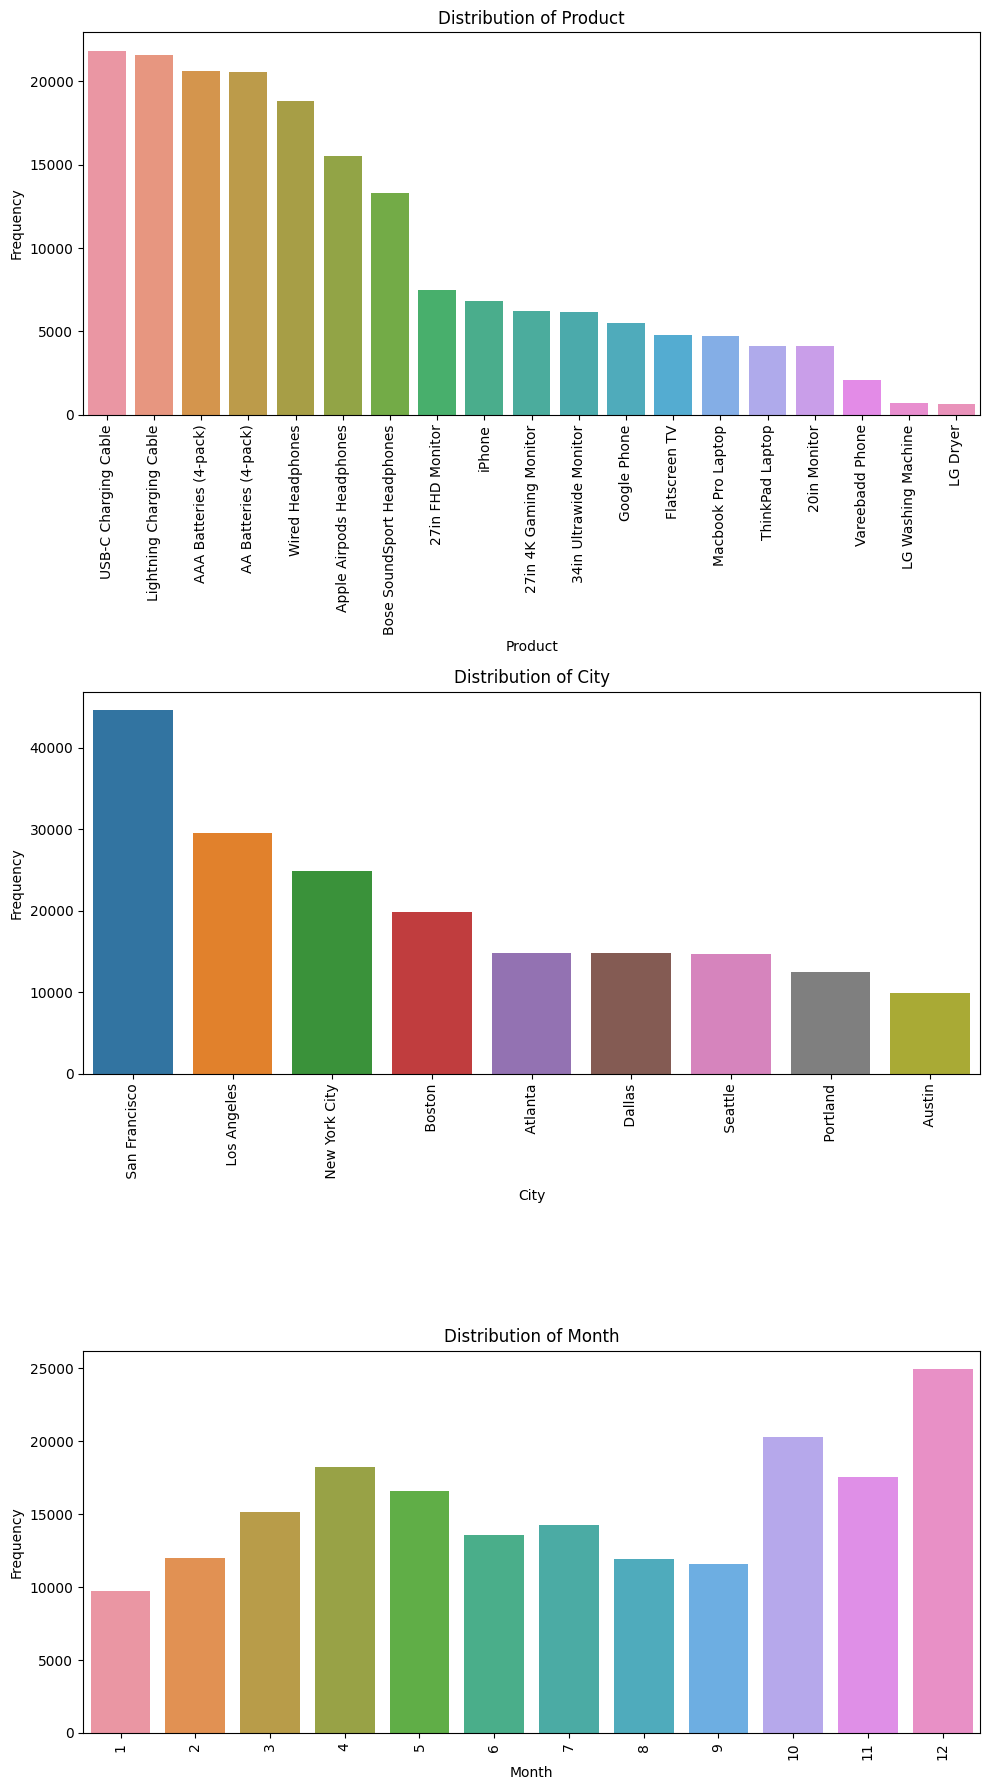

In [ ]:
# Define the categorical columns you want to visualize
categorical_columns = ["Product", "City", "Month"]

# Set up subplots for bar plots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 6 * len(categorical_columns)))
plt.subplots_adjust(hspace=0.5)

# Create bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    # Count the frequency of each category
    category_counts = df[column].value_counts()

    # Create a bar plot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


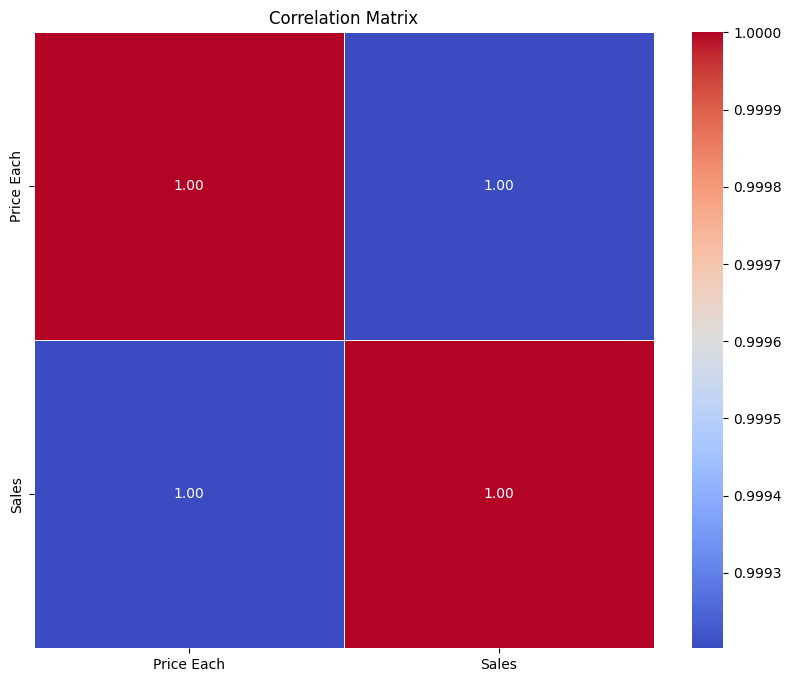

Significant correlations:
            Price Each     Sales
Price Each    1.000000  0.999202
Sales         0.999202  1.000000


In [ ]:
# Define the numerical columns for correlation analysis
numerical_columns = ["Price Each", "Sales"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Identify significant correlations
significant_correlations = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]
print("Significant correlations:")
print(significant_correlations)


In [ ]:
# Extract day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Extract day of the month
df['Day of Month'] = df['Order Date'].dt.day

# Calculate total sales per order
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

# Display the updated DataFrame with new features
print(df.head())


   Order ID               Product  Quantity Ordered  Price Each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour Day of Week  Day of Month  Total Sales  
0   New York City     0      Monday          

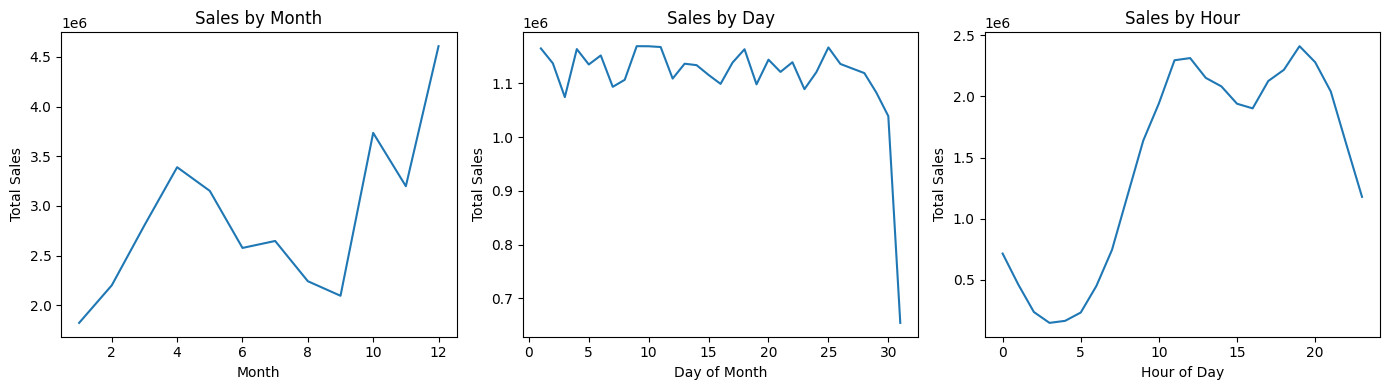

In [ ]:
# Extract additional time-related features
df['Day'] = df['Order Date'].dt.day

# Sales by Month
monthly_sales = df.groupby('Month')['Total Sales'].sum()

# Sales by Day
daily_sales = df.groupby('Day')['Total Sales'].sum()

# Sales by Hour
hourly_sales = df.groupby('Hour')['Total Sales'].sum()

# Create line charts for sales by Month, Day, and Hour
plt.figure(figsize=(14, 4))

# Sales by Month
plt.subplot(131)
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y=monthly_sales.values)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Sales by Day
plt.subplot(132)
sns.lineplot(data=daily_sales, x=daily_sales.index, y=daily_sales.values)
plt.title('Sales by Day')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')

# Sales by Hour
plt.subplot(133)
sns.lineplot(data=hourly_sales, x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()


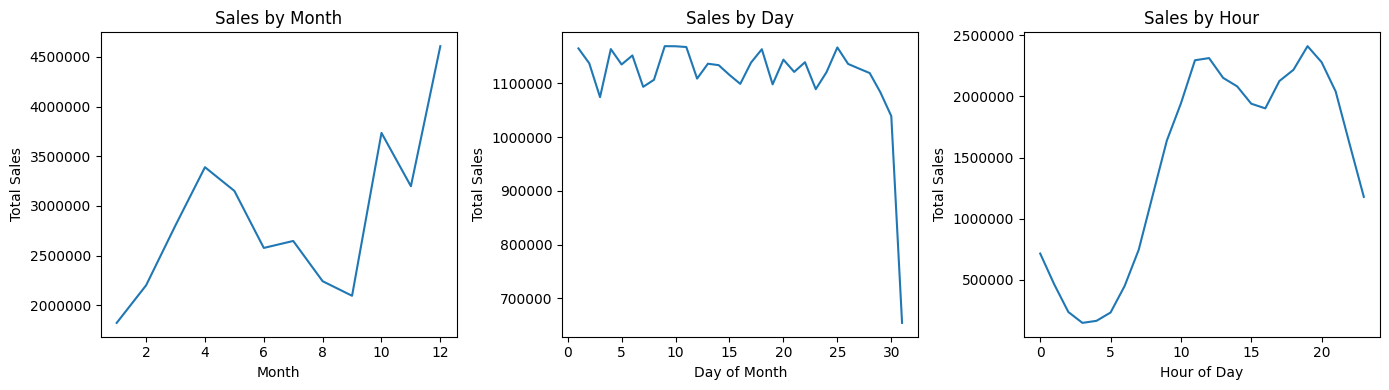

In [ ]:
# Create line charts for sales by Month, Day, and Hour
plt.figure(figsize=(14, 4))

# Sales by Month
plt.subplot(131)
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y=monthly_sales.values)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.ticklabel_format(style='plain', axis='y')  # Remove scaling on the y-axis

# Sales by Day
plt.subplot(132)
sns.lineplot(data=daily_sales, x=daily_sales.index, y=daily_sales.values)
plt.title('Sales by Day')
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')
plt.ticklabel_format(style='plain', axis='y')  # Remove scaling on the y-axis

# Sales by Hour
plt.subplot(133)
sns.lineplot(data=hourly_sales, x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.ticklabel_format(style='plain', axis='y')  # Remove scaling on the y-axis

plt.tight_layout()
plt.show()


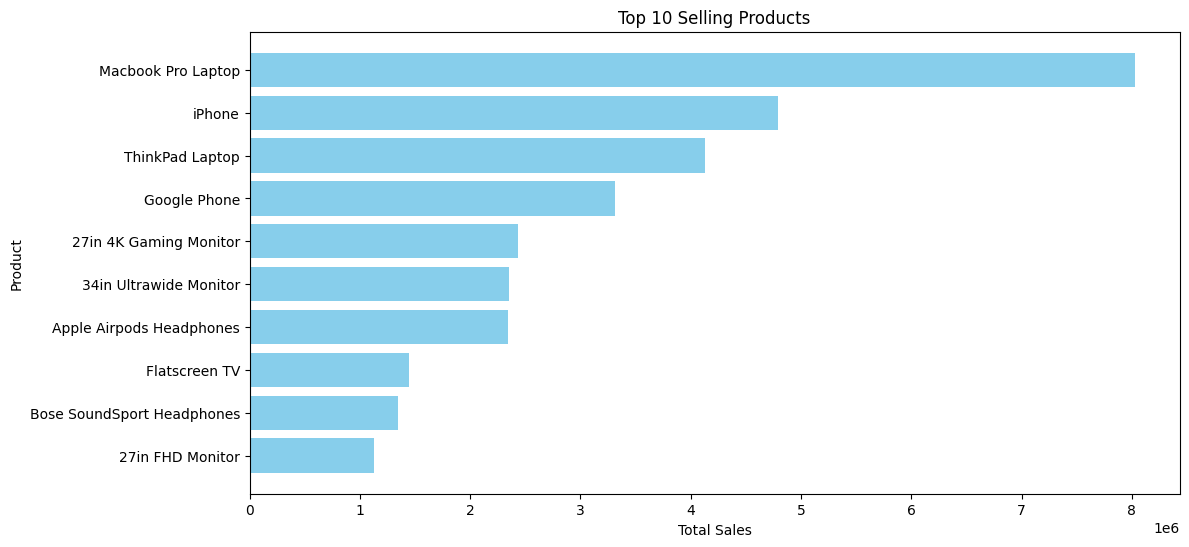

In [ ]:
# Group the data by 'Product' and calculate total sales for each product
product_sales = df.groupby('Product')['Total Sales'].sum().reset_index()

# Sort the products in descending order of total sales
top_selling_products = product_sales.sort_values(by='Total Sales', ascending=False)

# Extract the top N products
top_n = 10
top_selling_products = top_selling_products.head(top_n)

# Create a bar chart to visualize the top-selling products
plt.figure(figsize=(12, 6))
plt.barh(top_selling_products['Product'], top_selling_products['Total Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title(f'Top {top_n} Selling Products')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


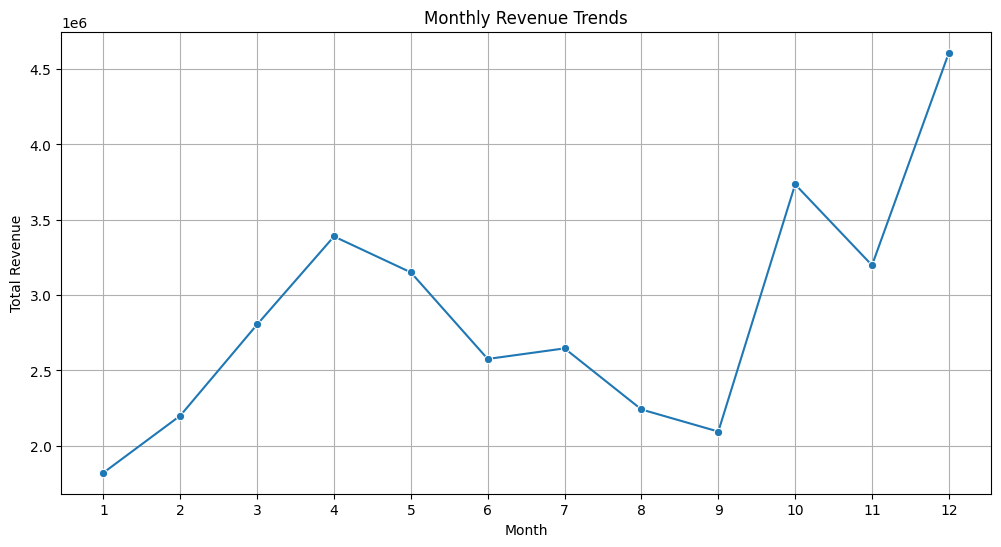

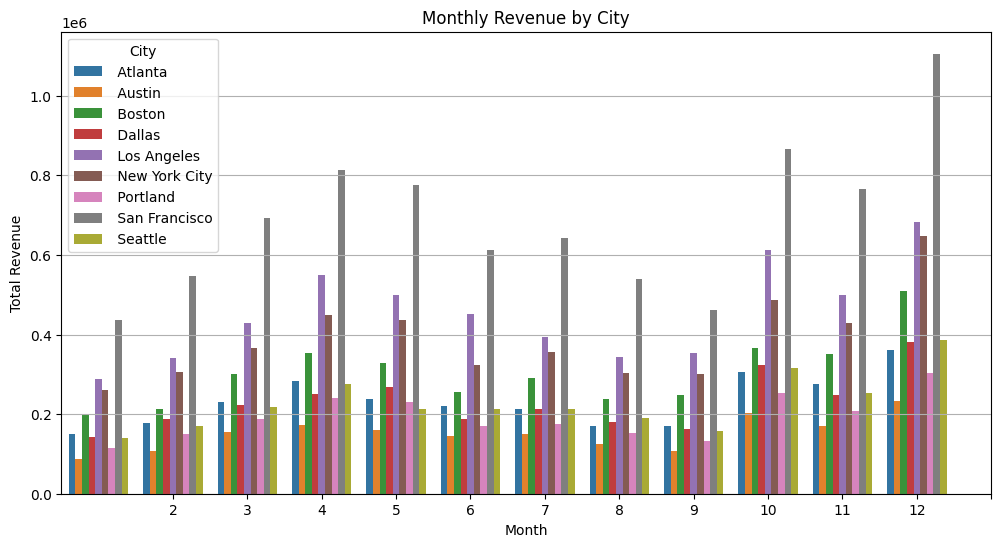

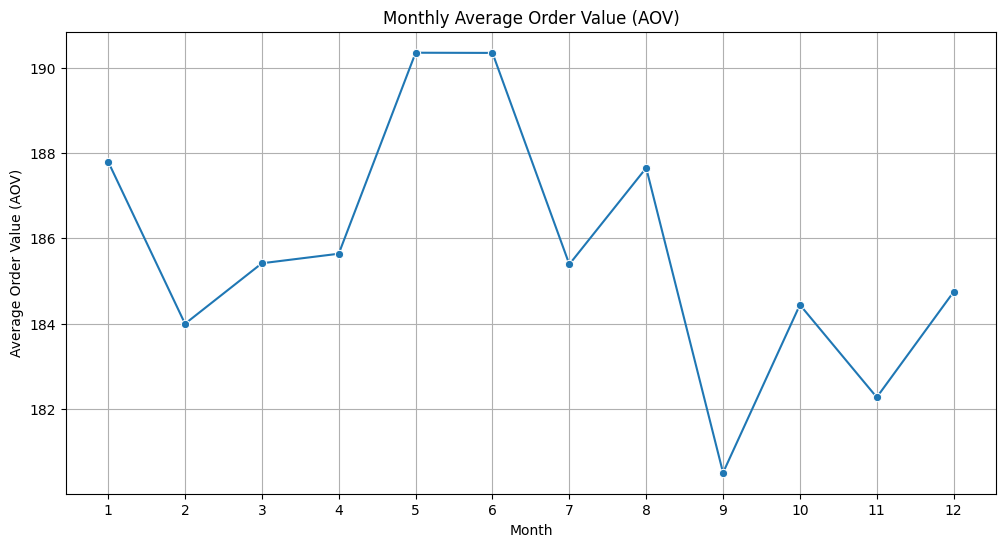

In [ ]:
# Calculate total revenue for each month and city
monthly_city_revenue = df.groupby(['Month', 'City'])['Total Sales'].sum().reset_index()

# Calculate total revenue for each month
monthly_revenue = df.groupby('Month')['Total Sales'].sum()

# Calculate the number of orders for each month
monthly_order_count = df.groupby('Month').size()

# Calculate average order value (AOV) for each month
average_order_value = monthly_revenue / monthly_order_count

# Create line chart for monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends')
plt.xticks(monthly_revenue.index)
plt.grid(True)

# Create bar chart for monthly revenue by city
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_city_revenue, x='Month', y='Total Sales', hue='City')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue by City')
plt.xticks(monthly_revenue.index)
plt.legend(title='City', loc='upper left')
plt.grid(axis='y')

# Create line chart for average order value (AOV) by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_order_value, x=average_order_value.index, y=average_order_value.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('Monthly Average Order Value (AOV)')
plt.xticks(monthly_revenue.index)
plt.grid(True)

plt.show()


Most Popular Products by Hour:
                     Product  Quantity Ordered
Hour                                          
0     AAA Batteries (4-pack)               712
1     AAA Batteries (4-pack)               387
2     AAA Batteries (4-pack)               206
3     AAA Batteries (4-pack)               139
4     AAA Batteries (4-pack)               131
5     AAA Batteries (4-pack)               227
6     AAA Batteries (4-pack)               411
7     AAA Batteries (4-pack)               696
8     AAA Batteries (4-pack)              1038
9     AAA Batteries (4-pack)              1495
10    AAA Batteries (4-pack)              1836
11    AAA Batteries (4-pack)              2126
12    AAA Batteries (4-pack)              2040
13    AAA Batteries (4-pack)              2083
14    AAA Batteries (4-pack)              1833
15    AAA Batteries (4-pack)              1553
16    AAA Batteries (4-pack)              1651
17    AAA Batteries (4-pack)              1845
18    AAA Batteries (4-pack) 

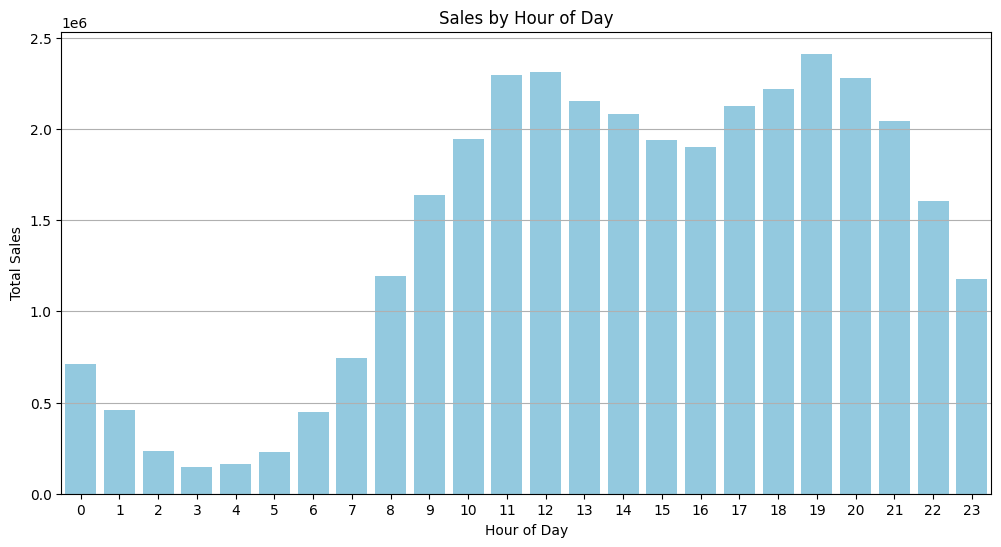

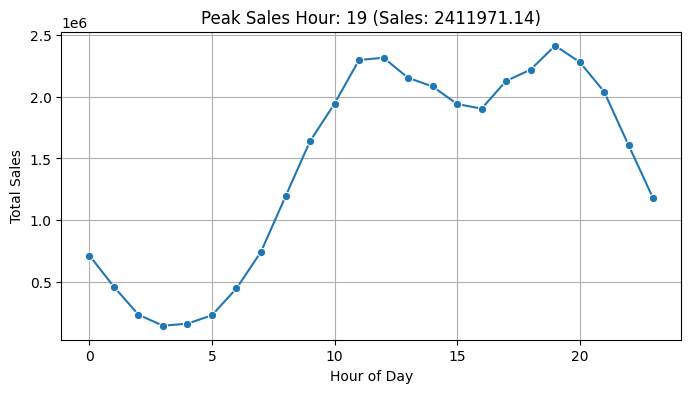

In [ ]:
# Analyze sales by hour of the day
hourly_sales = df.groupby('Hour')['Total Sales'].sum()

# Identify peak sales hours
peak_hours = hourly_sales.idxmax()
peak_sales = hourly_sales.max()

# Create a bar chart to visualize sales by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Hour', y='Total Sales', estimator=sum, errorbar=None, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Sales by Hour of Day')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Create a line chart to show peak sales hour
plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_sales, x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title(f'Peak Sales Hour: {peak_hours} (Sales: {peak_sales:.2f})')
plt.grid(True)

# Analyze popular products by hour
hourly_popular_products = df.groupby(['Hour', 'Product'])['Quantity Ordered'].sum().reset_index()
hourly_popular_products = hourly_popular_products.sort_values(by=['Hour', 'Quantity Ordered'], ascending=[True, False])

# Display the most popular product for each hour
most_popular_products = hourly_popular_products.groupby('Hour').first()

print("Most Popular Products by Hour:")
print(most_popular_products)

plt.show()


Hypothesis: Product Prices Affect Sales

Null Hypothesis (H0): Product prices have no significant effect on sales.

Alternative Hypothesis (H1): Product prices have a significant effect on sales.

Perform a hypothesis test (e.g., t-test or ANOVA) to determine if there is a significant difference in sales for different price ranges of products.

In [ ]:
# Define the numerical columns for the analysis
numerical_columns = ["Price Each", "Sales"]

# Set up price ranges
price_ranges = [(0, 500), (500, 1000), (1000, 2000)]

# Perform ANOVA test for each price range
results = []

for price_range in price_ranges:
    low_price, high_price = price_range
    subset = df[(df["Price Each"] >= low_price) & (df["Price Each"] < high_price)]

    # Create a list to store sales data for different product categories
    sales_by_category = []

    for category_name, category_group in subset.groupby('Product'):
        sales_by_category.append(category_group["Sales"])

    # Perform ANOVA test on sales data for different categories within the price range
    if len(sales_by_category) >= 2:  # Check if there are at least two samples
        result = stats.f_oneway(*sales_by_category)
        results.append((f"${low_price}-{high_price}", result))

# Print ANOVA results
for price_range, result in results:
    print(f"ANOVA for {price_range}:")
    print(f"F-statistic: {result.statistic}")
    print(f"P-value: {result.pvalue}")
    if result.pvalue < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")
    print()


ANOVA for $0-500:
F-statistic: 2279604.63166087
P-value: 0.0
Result: Reject null hypothesis (H0)

ANOVA for $500-1000:
F-statistic: 236410.31449191965
P-value: 0.0
Result: Reject null hypothesis (H0)



Hypothesis: Order Hour Affects Sales

Null Hypothesis (H0): The time of day when orders are placed has no significant effect on sales.

Alternative Hypothesis (H1): The time of day when orders are placed has a significant effect on sales.
Perform a hypothesis test to determine if there is a significant difference in sales between different hours of the day.

In [ ]:
# Define the numerical columns for the analysis
numerical_columns = ["Sales", "Hour"]

# Set up the hours of the day to compare (adjust as needed)
hours_to_compare = [8, 12, 16, 20]

# Perform t-test for each pair of hours
results = []

for i in range(len(hours_to_compare)):
    for j in range(i+1, len(hours_to_compare)):
        hour1 = hours_to_compare[i]
        hour2 = hours_to_compare[j]

        # Select sales data for each hour
        sales_hour1 = df[df["Hour"] == hour1]["Sales"]
        sales_hour2 = df[df["Hour"] == hour2]["Sales"]

        # Perform a two-sample t-test
        t_stat, p_value = stats.ttest_ind(sales_hour1, sales_hour2)

        results.append((hour1, hour2, t_stat, p_value))

# Print t-test results
for hour1, hour2, t_stat, p_value in results:
    print(f"t-test between {hour1} and {hour2}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")
    print()


t-test between 8 and 12:
T-statistic: 1.2918404747605685
P-value: 0.19642825638711933
Result: Fail to reject null hypothesis (H0)

t-test between 8 and 16:
T-statistic: 1.3179059756332225
P-value: 0.18755330163495695
Result: Fail to reject null hypothesis (H0)

t-test between 8 and 20:
T-statistic: 0.7708162843565415
P-value: 0.44082569449221576
Result: Fail to reject null hypothesis (H0)

t-test between 12 and 16:
T-statistic: 0.09484458189631698
P-value: 0.9244391039699408
Result: Fail to reject null hypothesis (H0)

t-test between 12 and 20:
T-statistic: -0.6167104224397283
P-value: 0.5374314090654988
Result: Fail to reject null hypothesis (H0)

t-test between 16 and 20:
T-statistic: -0.6769704073769758
P-value: 0.49843166695005947
Result: Fail to reject null hypothesis (H0)



Hypothesis: Location (City) Affects Sales

Null Hypothesis (H0): The location (city) where orders are placed has no significant effect on sales.

Alternative Hypothesis (H1): The location (city) where orders are placed has a significant effect on sales.

Perform a hypothesis test (e.g., ANOVA) to determine if there is a significant difference in sales between different cities.


In [ ]:
# Define the numerical columns for the analysis
numerical_columns = ["Sales", "City"]

# Perform ANOVA test for different cities
results = []

# Group the data by city and collect sales data for each city
city_groups = [group for name, group in df.groupby('City')]
sales_by_city = [group["Sales"] for group in city_groups]

# Perform ANOVA test on sales data for different cities
if len(sales_by_city) >= 2:  # Check if there are at least two cities
    result = stats.f_oneway(*sales_by_city)
    results.append(("Cities", result))

# Print ANOVA results
for category, result in results:
    print(f"ANOVA for {category}:")
    print(f"F-statistic: {result.statistic}")
    print(f"P-value: {result.pvalue}")
    if result.pvalue < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")
    print()


ANOVA for Cities:
F-statistic: 0.4529590139191068
P-value: 0.8893805411896305
Result: Fail to reject null hypothesis (H0)



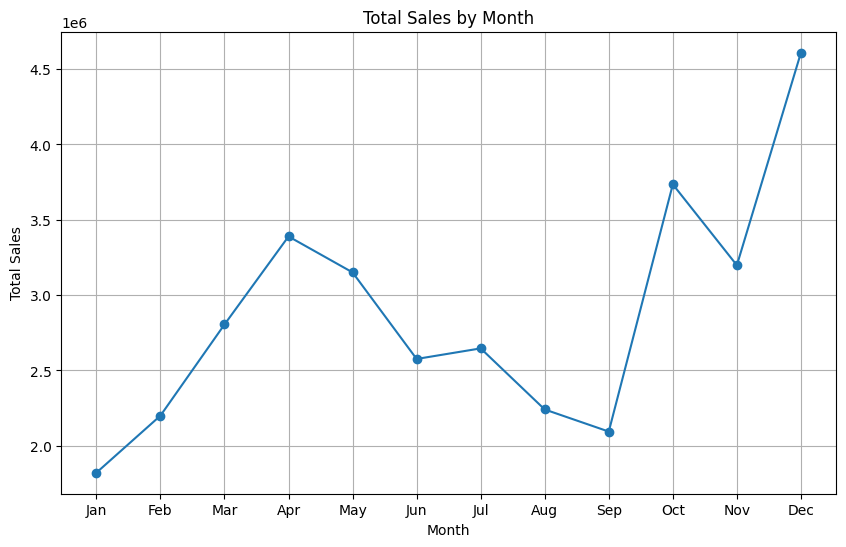

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot the total sales for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

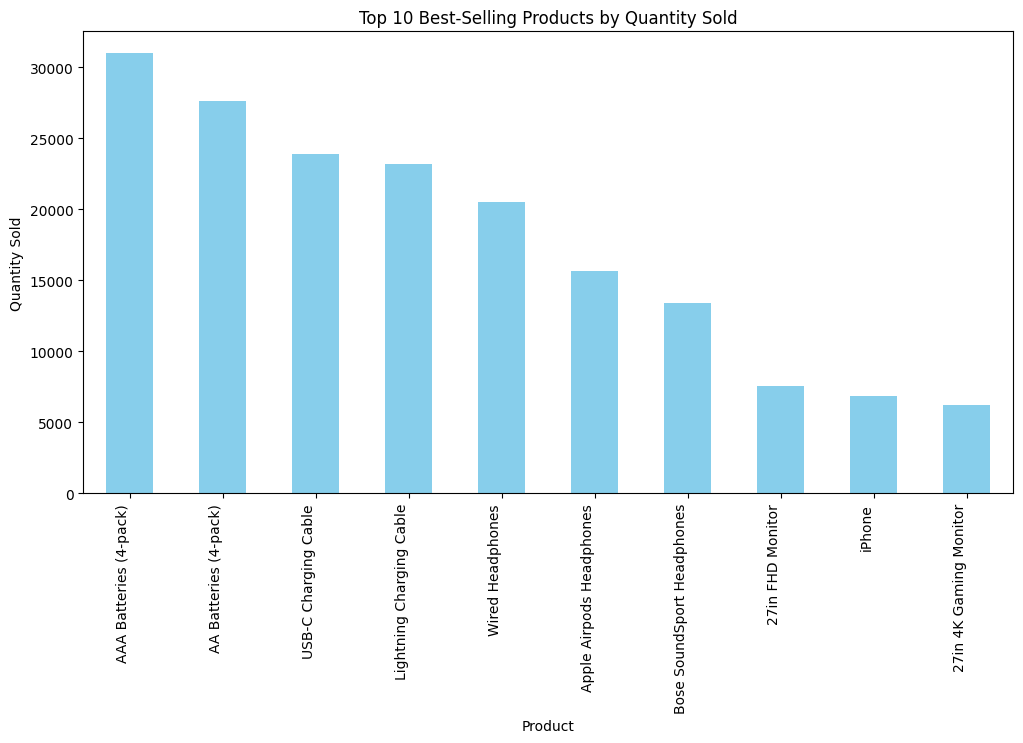

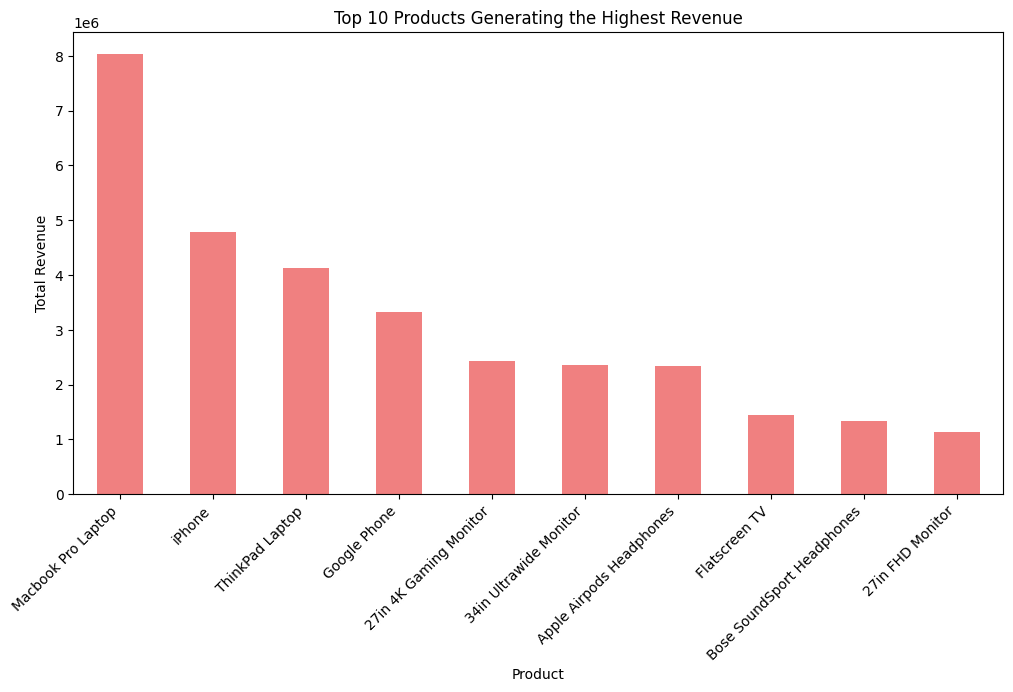

In [ ]:
# Group by product and calculate quantity sold and total revenue
product_quantity = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
product_revenue = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Plot the top N best-selling products by quantity sold
top_n = 10  # Change this number to view the top N products
plt.figure(figsize=(12, 6))
product_quantity.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Best-Selling Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90, ha='right')
plt.show()

# Plot the top N products generating the highest revenue
plt.figure(figsize=(12, 6))
product_revenue.head(top_n).plot(kind='bar', color='lightcoral')
plt.title(f'Top {top_n} Products Generating the Highest Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()




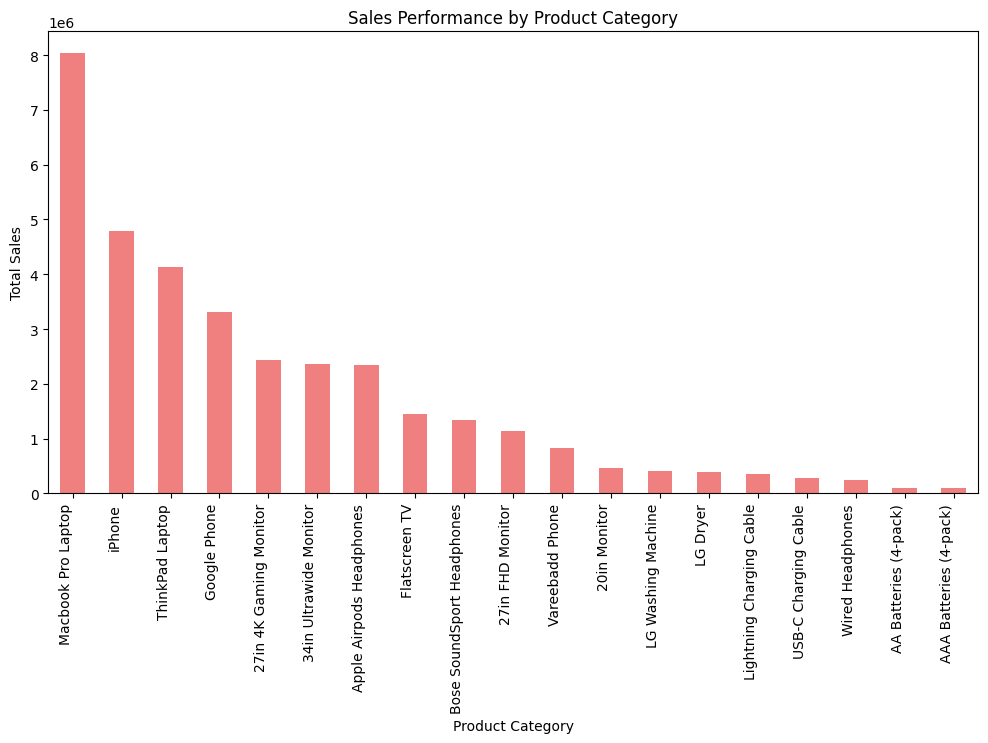

In [ ]:
# Explore correlations between product categories and sales performance
product_category_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart to visualize sales performance by product category
plt.figure(figsize=(12, 6))
product_category_sales.plot(kind='bar', color='lightcoral')
plt.title('Sales Performance by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='right')
plt.show()


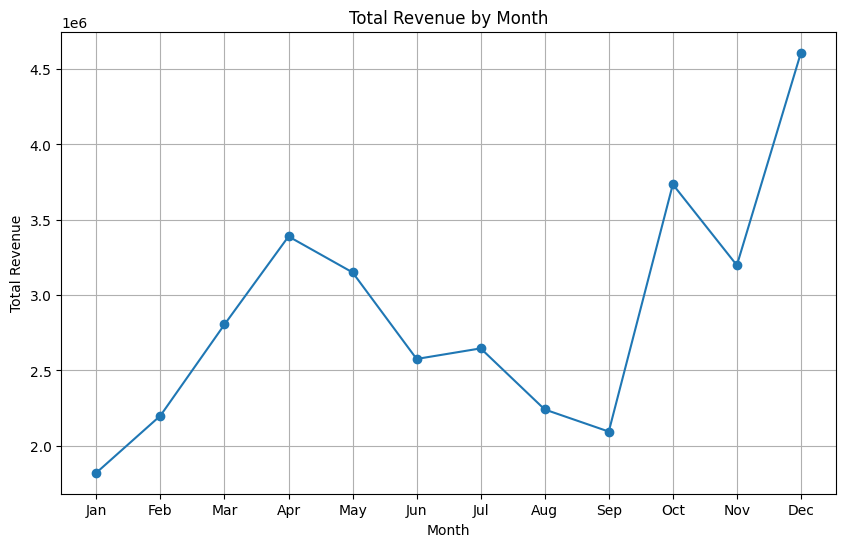

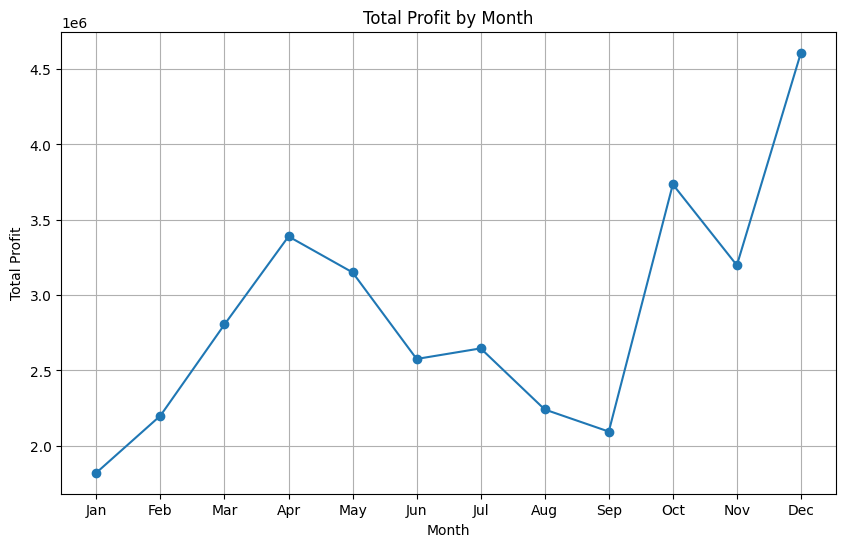

In [ ]:
# Calculate total revenue for each month
monthly_revenue = df.groupby('Month')['Sales'].sum()

# Calculate profit for each month (Profit = Total Sales)
monthly_profit = monthly_revenue  # Assuming no cost data available

# Plot total revenue for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plot total profit for each month (same as total revenue in this case)
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  int64         
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
 9   Hour              185686 non-null  int64         
 10  Day of Week       185686 non-null  object        
 11  Day of Month      185686 non-null  int64         
 12  Total Sales       185686 non-null  float64       
 13  Day               185686 non-null  int64         
 14  Tota

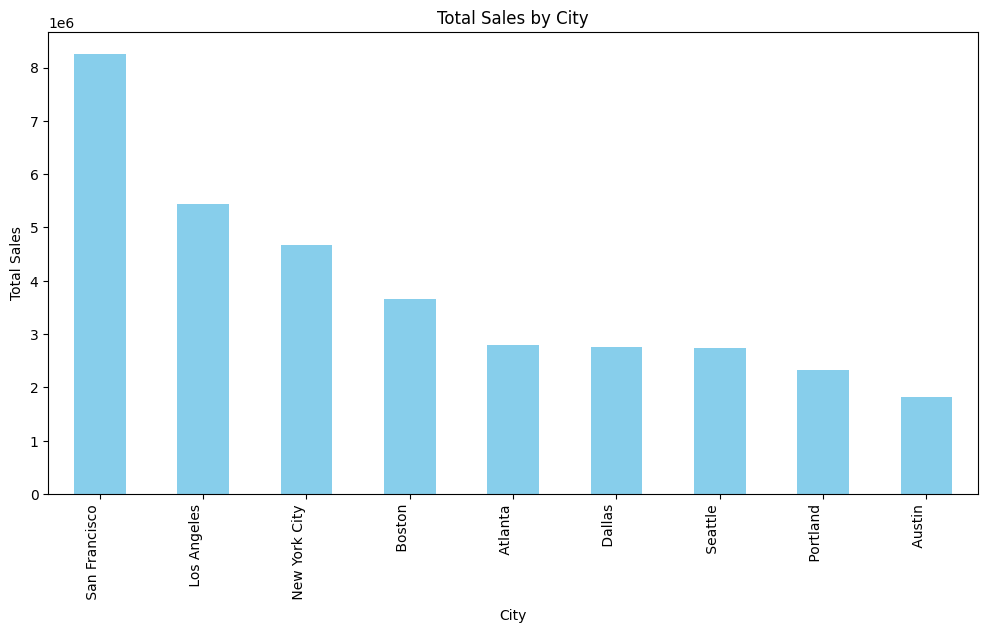

In [ ]:
# Calculate total sales for each city
city_total_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot cities with the highest total sales
plt.figure(figsize=(12, 6))
city_total_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='right')
plt.show()



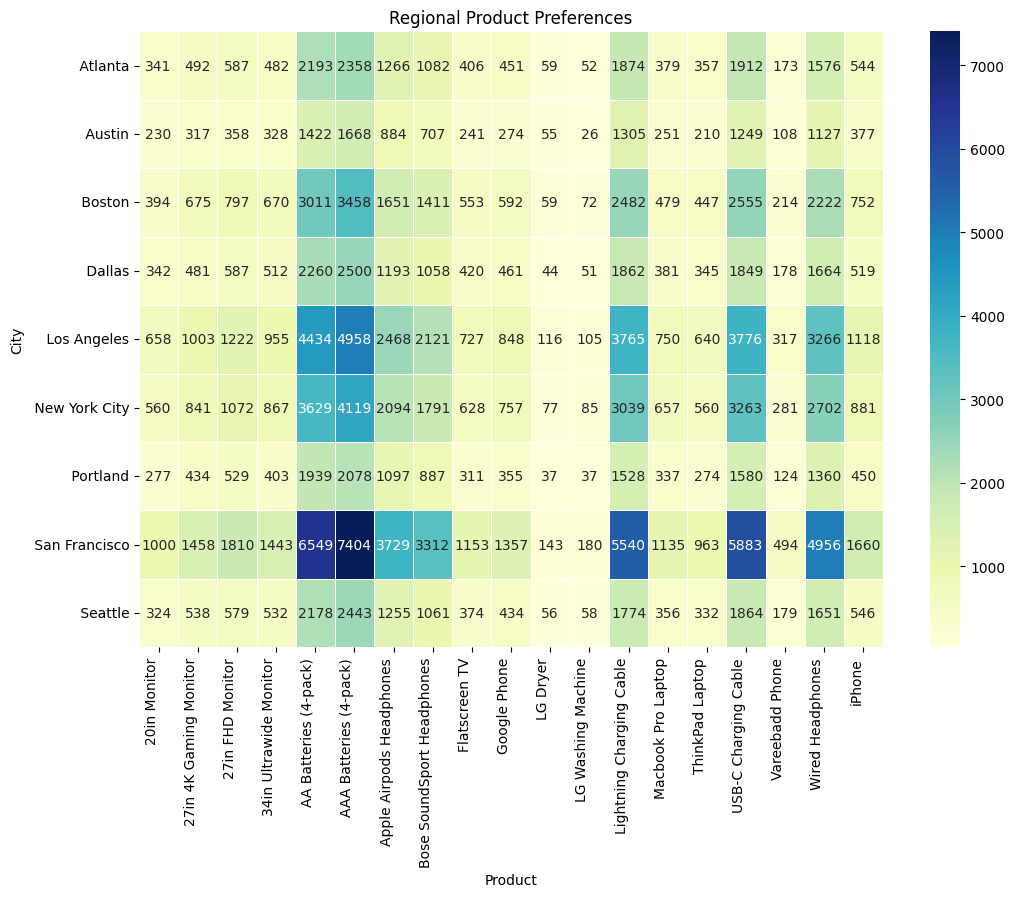

In [ ]:
# Group by 'City' and 'Product' to count the number of each product sold in each city
city_product_preferences = df.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()

# Pivot the table to have cities as rows and products as columns
product_preferences_pivot = city_product_preferences.pivot(index='City', columns='Product', values='Quantity Ordered')

# Plot a heatmap to visualize regional product preferences
plt.figure(figsize=(12, 8))
sns.heatmap(product_preferences_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Regional Product Preferences')
plt.xlabel('Product')
plt.ylabel('City')
plt.xticks(rotation=90, ha='right')
plt.show()


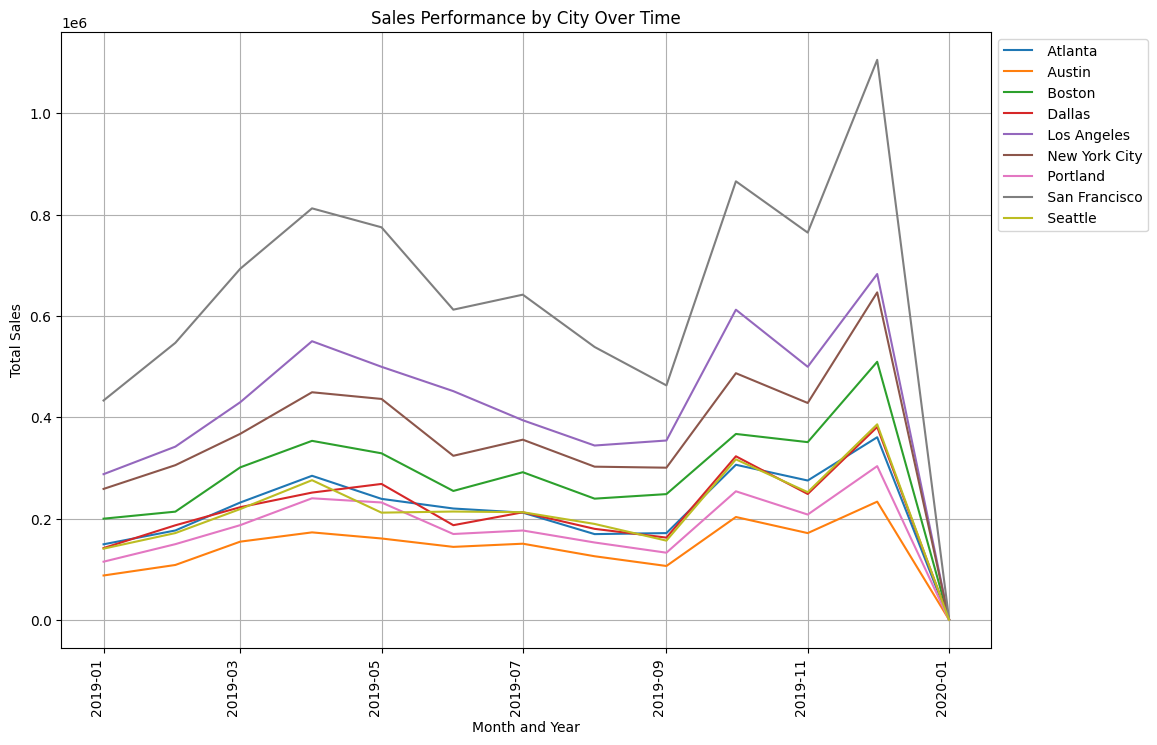

In [ ]:
# Extract the 'Month' and 'Year' columns
df['Year'] = df['Order Date'].dt.year

# Combine 'Year' and 'Month' into a single date column
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')

# Calculate total sales for each city by month and year
city_monthly_sales = df.groupby(['YearMonth', 'City'])['Sales'].sum().unstack().fillna(0)

# Plot sales performance by city over time
plt.figure(figsize=(12, 8))
for city in city_monthly_sales.columns:
    plt.plot(city_monthly_sales.index, city_monthly_sales[city], label=city)
plt.title('Sales Performance by City Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.show()


The most common hour for placing orders is 19:00.


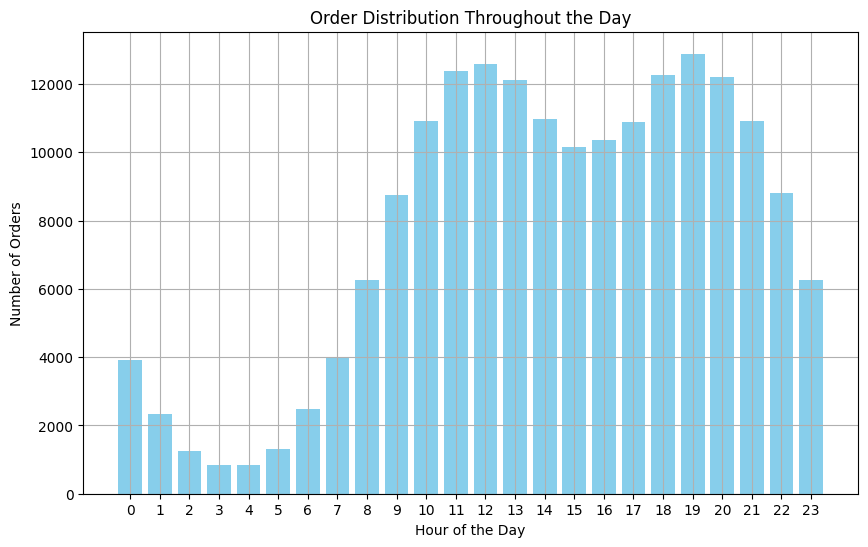

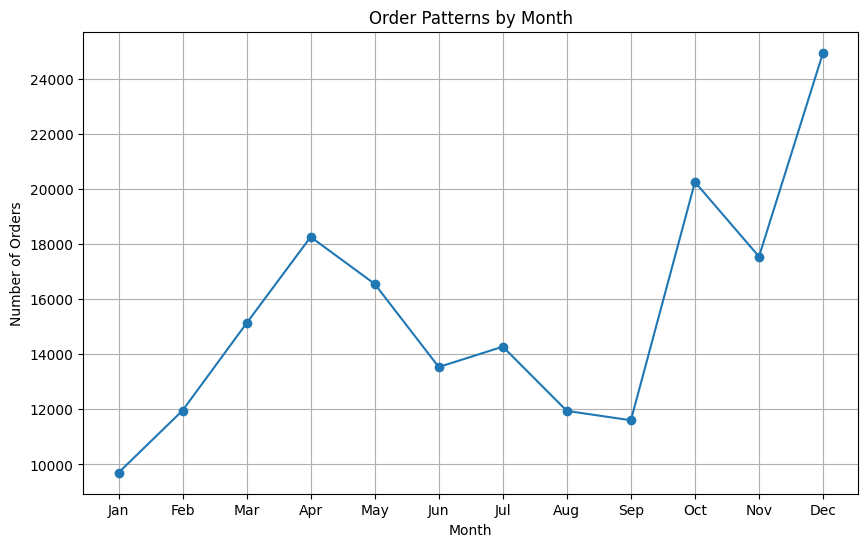

In [ ]:
# Determine the most common hour for placing orders
most_common_hour = df['Hour'].mode().values[0]
print(f"The most common hour for placing orders is {most_common_hour}:00.")

# Plot the distribution of order times throughout the day
plt.figure(figsize=(10, 6))
order_counts_by_hour = df['Hour'].value_counts().sort_index()
plt.bar(order_counts_by_hour.index, order_counts_by_hour.values, color='skyblue')
plt.title('Order Distribution Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Explore order patterns by month
monthly_order_counts = df.groupby('Month')['Order ID'].count()

# Plot order patterns by month
plt.figure(figsize=(10, 6))
monthly_order_counts.plot(marker='o', linestyle='-')
plt.title('Order Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


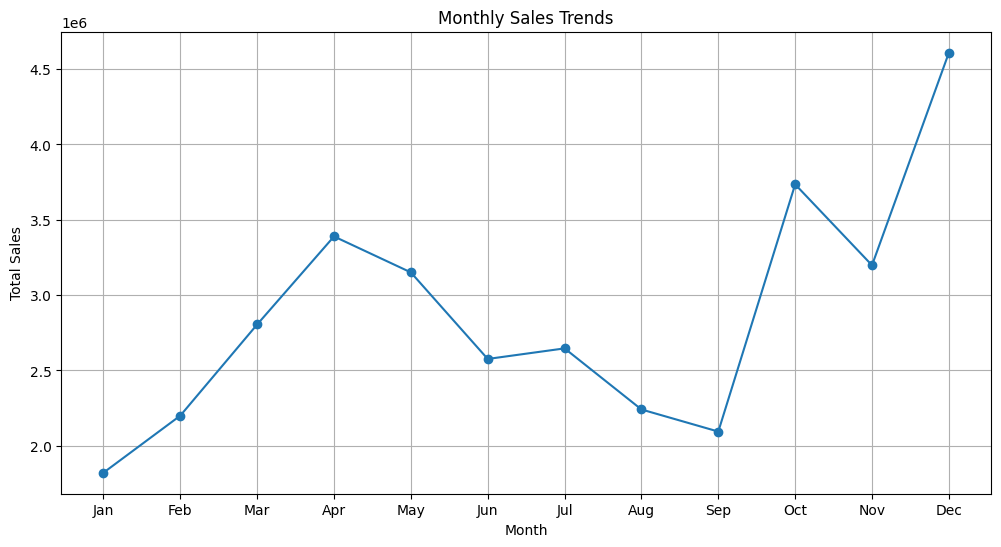

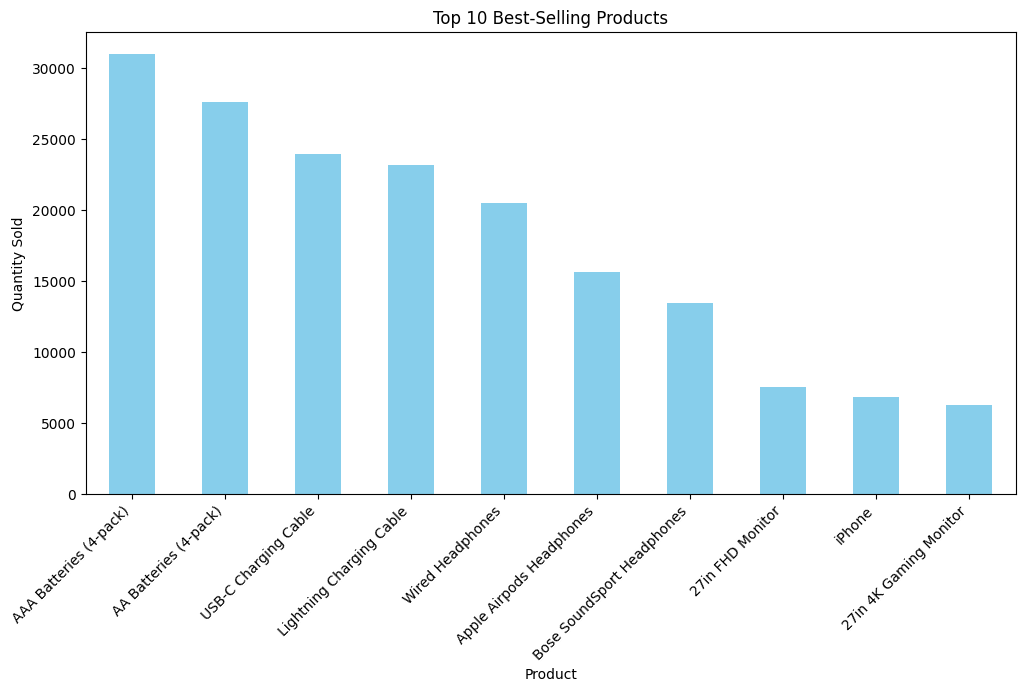

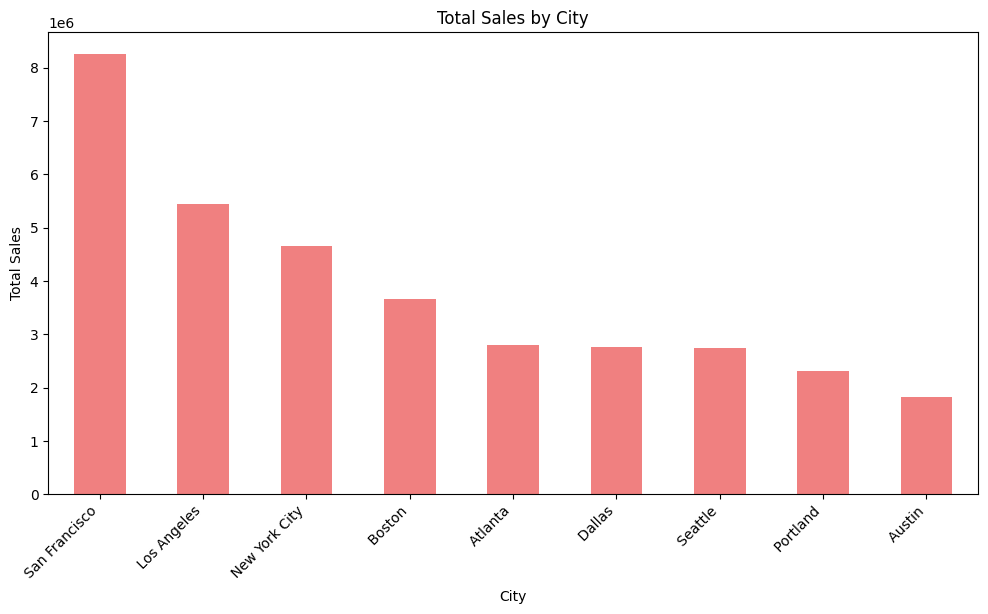

In [ ]:
# Create a line chart to visualize monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Create a bar chart to show the best-selling products
plt.figure(figsize=(12, 6))
best_selling_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
best_selling_products.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a bar chart to display sales by city
plt.figure(figsize=(12, 6))
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()
